In [47]:
!pip install caer canaro

In [48]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # 0 = all logs, 3 = only fatal errors
import tensorflow as tf

In [49]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc

In [50]:
IMG_SIZE=(80,80)
channels=1
char_path=r'/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset'

In [51]:
char_dict={}
for char in os.listdir(char_path):
    char_dict[char]=len(os.listdir(os.path.join(char_path,char)))
#Sort in descending
char_dict=caer.sort_dict(char_dict,descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [52]:
characters=[]
count=0
for i in char_dict:
    characters.append(i[0])
    count+=1
    if count>=10:
        break
characters


['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [53]:
#Create the training data
train= caer.preprocess_from_dir(char_path,characters,channels=channels,IMG_SIZE=IMG_SIZE,isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 0.7232415676116943s
[INFO] At 1000 files
[INFO] 1454 files found in 0.5797245502471924s
[INFO] At 1000 files
[INFO] 1452 files found in 0.5145208835601807s
[INFO] At 1000 files
[INFO] 1354 files found in 0.5474286079406738s
[INFO] At 1000 files
[INFO] 1342 files found in 0.5284848213195801s
[INFO] At 1000 files
[INFO] 1291 files found in 0.5110812187194824s
[INFO] At 1000 files
[INFO] 1206 files found in 0.5159361362457275s
[INFO] At 1000 files
[INFO] 1194 files found in 0.4654965400695801s
[INFO] At 1000 files
[INFO] 1193 files found in 0.494612455368042s
[INFO] At 1000 files
[INFO] 1079 files found in 0.4879295825958252s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 0m 36s


In [54]:
len(train)

13811

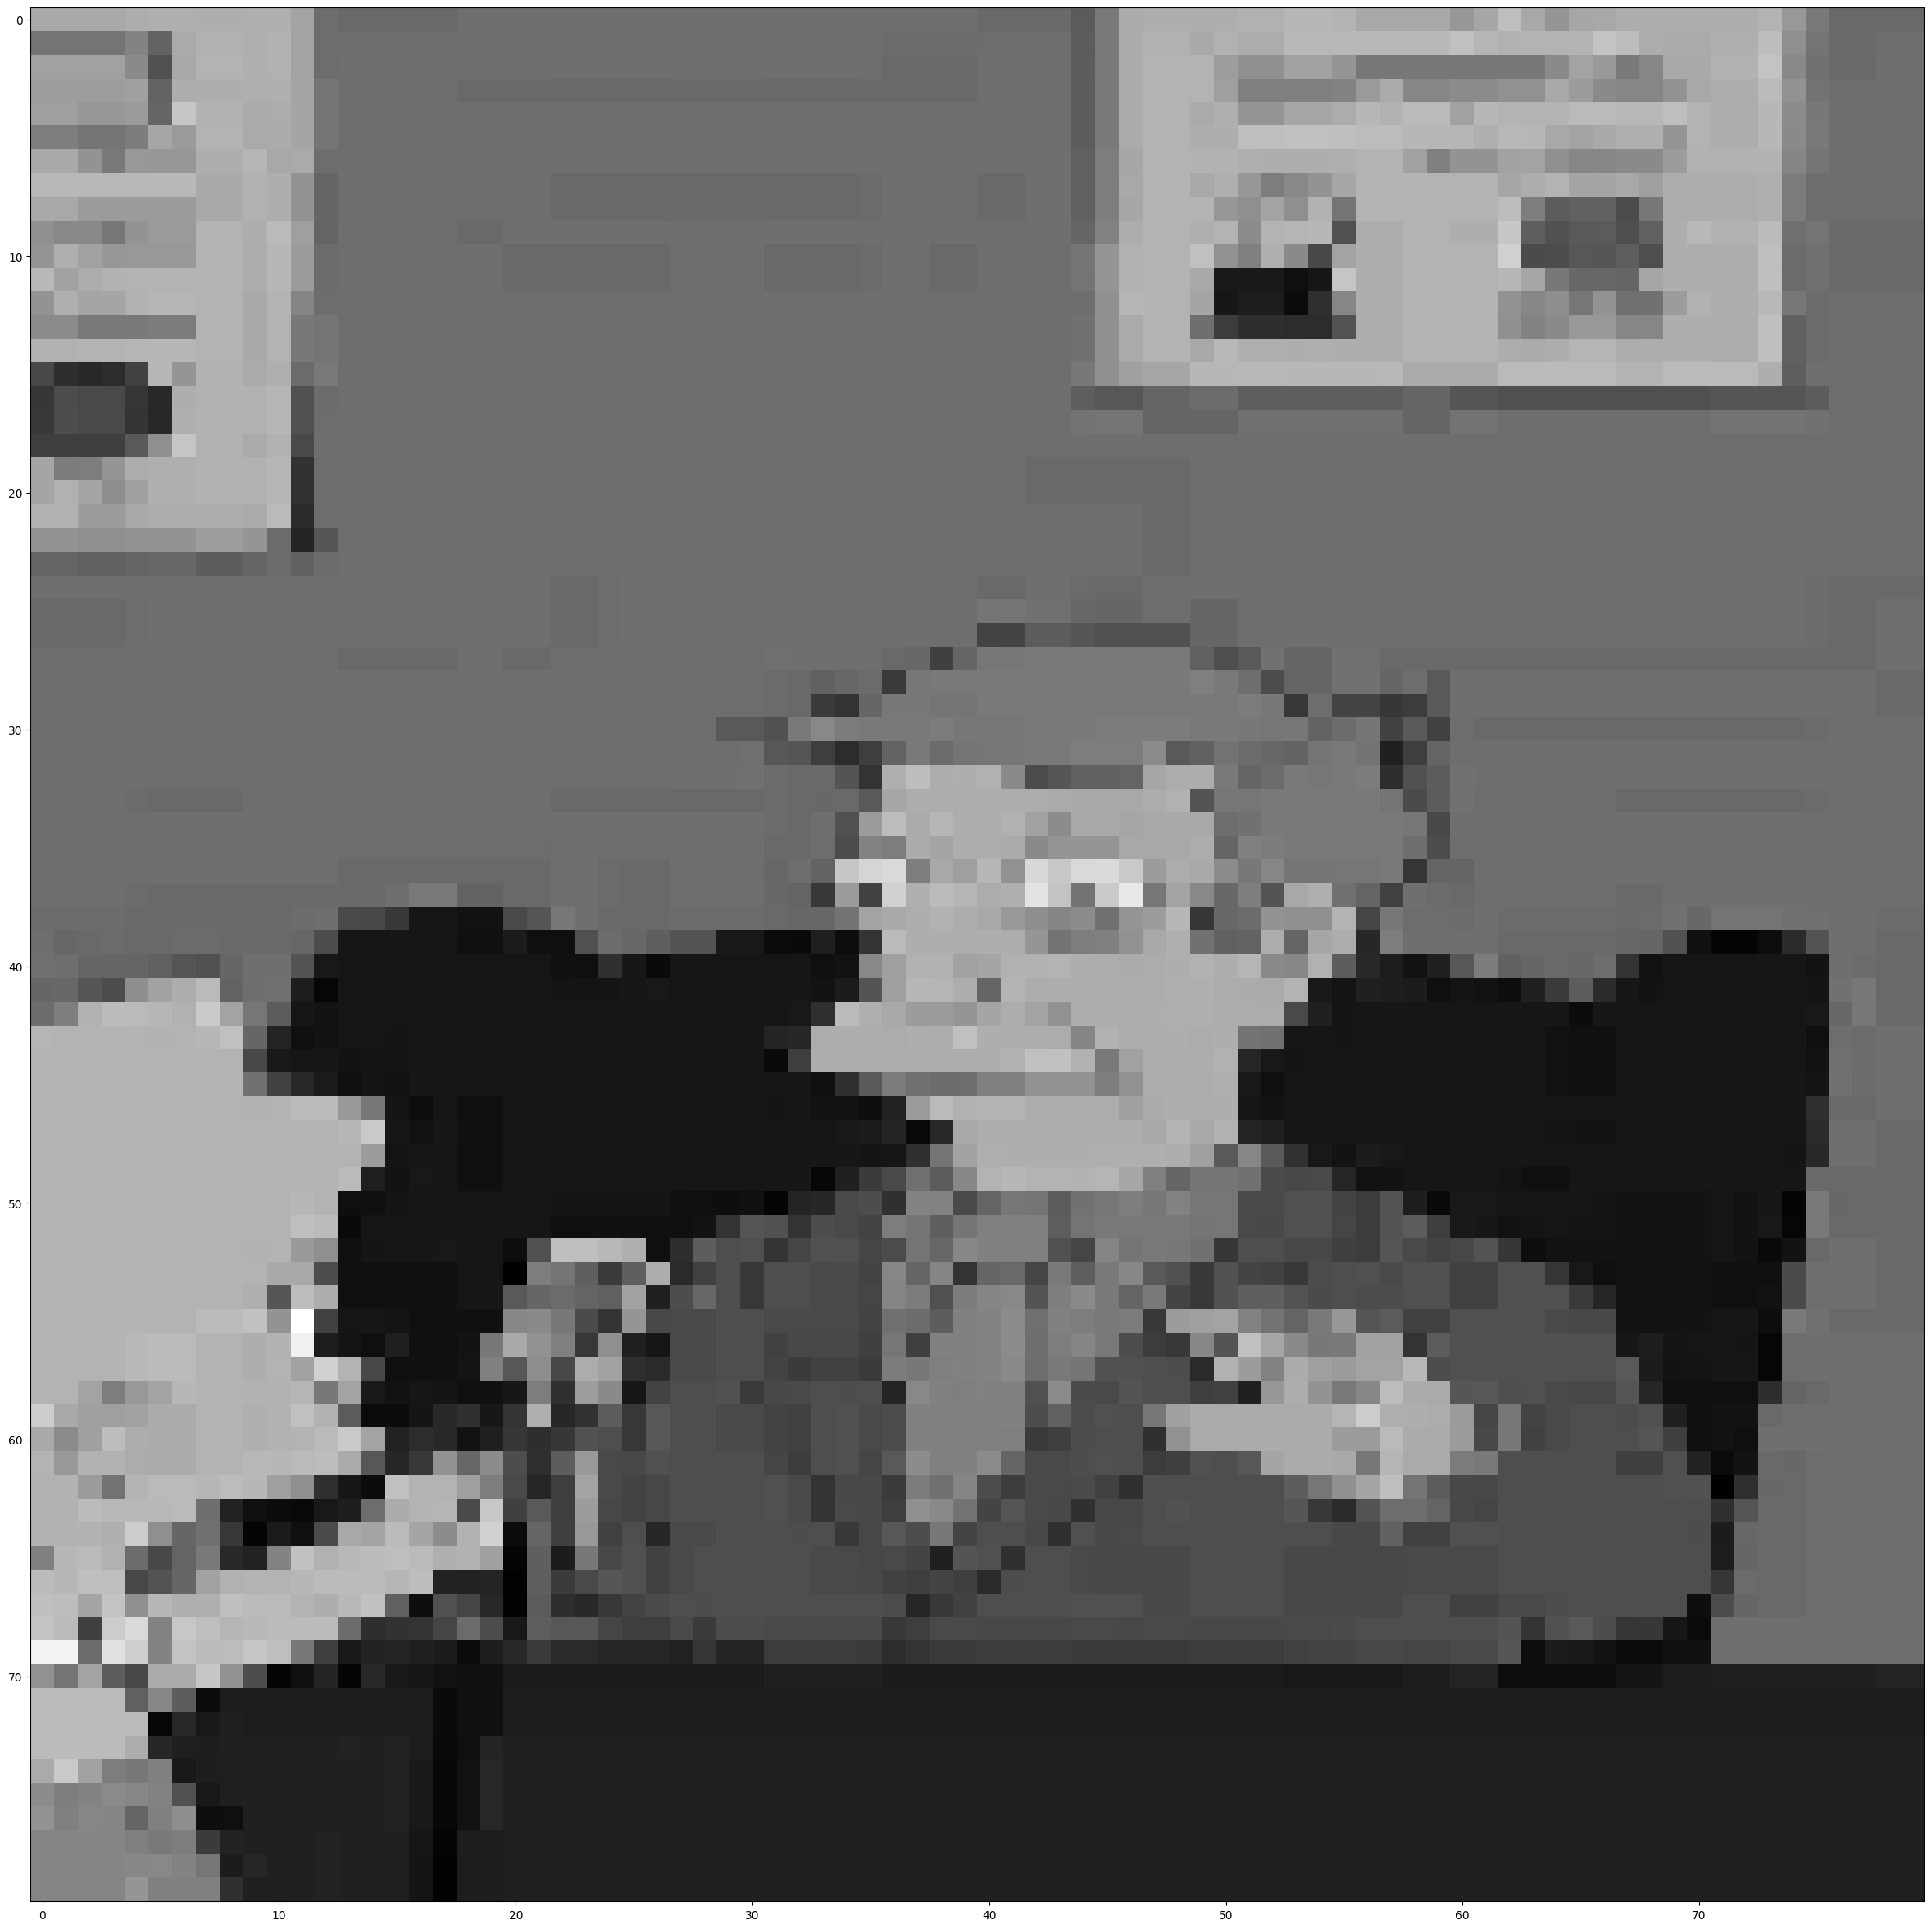

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0],cmap='gray')
plt.show()

In [56]:
featureSet, labels= caer.sep_train(train, IMG_SIZE=IMG_SIZE)

In [57]:
from tensorflow.keras.utils import to_categorical
#Normalize the featureSet ==> (0,1)
featureSet=caer.normalize(featureSet)
labels=to_categorical(labels,len(characters))

In [58]:
x_train,x_val, y_train, y_val= caer.train_val_split(featureSet, labels, val_ratio=.2)

In [59]:
%whos

Variable                Type                  Data/Info
-------------------------------------------------------
BATCH_SIZE              int                   32
EPOCHS                  int                   10
IMG_SIZE                tuple                 n=2
LearningRateScheduler   type                  <class 'keras.src.callbac<...>r.LearningRateScheduler'>
caer                    module                <module 'caer' from '/usr<...>ckages/caer/__init__.py'>
callbacks_list          list                  n=1
canaro                  module                <module 'canaro' from '/u<...>ages/canaro/__init__.py'>
channels                int                   1
char                    str                   sideshow_bob
char_dict               list                  n=43
char_path               str                   /kaggle/input/the-simpson<...>-dataset/simpsons_dataset
characters              list                  n=10
count                   int                   10
cv                      

In [60]:
del train
del featureSet
del labels
gc.collect()

0

In [68]:
BATCH_SIZE=32
EPOCHS=30

In [70]:
#Image generator
datagen=canaro.generators.imageDataGenerator()
train_gen=datagen.flow(x_train,y_train, batch_size=BATCH_SIZE)

In [63]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 1)), # Change for custom dataset size
    layers.BatchNormalization(),  # Normalize activations

    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),  # Normalize activations

    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),  # Normalize activations

    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.5),

    
    layers.GlobalAveragePooling2D(),  # Reduces feature maps to a fixed 1D vector
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')  # Change number of classes accordingly
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 164,746 (643.54 KB)

 Trainable params: 164,298 (641.79 KB)

 Non-trainable params: 448 (1.75 KB)

In [64]:
x_batch, y_batch = next(train_gen)
print("Batch labels shape:", y_batch.shape)  # Must be (32, 10)

Batch labels shape: (32, 10)


In [65]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

In [71]:
import tensorflow as tf
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True),
    loss='categorical_crossentropy',  # Use 'binary_crossentropy' for binary classification
    metrics=['accuracy']
)


training = model.fit(train_gen,
                    steps_per_epoch = len(x_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks=callbacks_list
                    )

Epoch 1/30
345/345 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.4302 - loss: 1.6917 - val_accuracy: 0.1820 - val_loss: 5.5932 - learning_rate: 0.0100
Epoch 2/30
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.5625 - loss: 1.5262 - val_accuracy: 0.1889 - val_loss: 5.3270 - learning_rate: 0.0100
Epoch 3/30
345/345 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.4843 - loss: 1.5740 - val_accuracy: 0.2677 - val_loss: 3.2380 - learning_rate: 0.0100
Epoch 4/30
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.5312 - loss: 1.6387 - val_accuracy: 0.2214 - val_loss: 4.4525 - learning_rate: 0.0100
Epoch 5/30
345/345 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5175 - loss: 1.4515 - val_accuracy: 0.4399 - val_loss: 1.8376 - learning_rate: 0.0100
Epoch 6/30
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.3438 - loss: 1.9305 - val_accuracy: 0.4436 - val_loss: 1.8941 - learning_rate: 0.0100
Epoch 7/30
345/345 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.5532 - loss

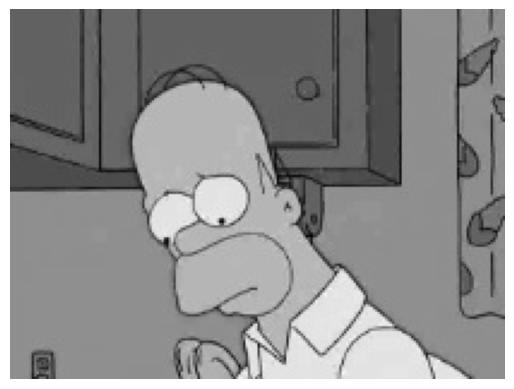

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
Predicted class: 0
homer_simpson


In [67]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

test_path = '/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/homer_simpson_20.jpg'

# Image size must match training input size
IMG_SIZE = (80, 80)  

def prepare(img_path):
    img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)  # Load image as grayscale
    img = cv.resize(img, IMG_SIZE)  # Resize to match model input
    img = np.reshape(img, (1, 80, 80, 1))  # Add batch dimension
    img = img.astype('float32') / 255.0  # Normalize to [0, 1]
    return img

# Show the image
img = cv.imread(test_path, cv.IMREAD_GRAYSCALE)  # Read in grayscale
plt.imshow(img, cmap='gray')  # Show correctly
plt.axis('off')
plt.show()

# Predict
prepared_img = prepare(test_path)
predictions = model.predict(prepared_img)

# Get class label
predicted_class = np.argmax(predictions)  # Find the highest probability class
print(f"Predicted class: {predicted_class}")

final_char = characters[predicted_class]
print(final_char)